# Обязательные вещи

In [7]:
import numpy as np
from scipy.stats import *
from scipy.special import *
from itertools import *
from more_itertools import *
import sympy as sy
import math
import statistics as statsv
import pandas as pd
from fractions import Fraction
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from tqdm.notebook import tqdm
import functools as ft
import random as rn
#########################
plt.rcParams['axes.formatter.use_locale'] = True
#########
#########
plt.rcParams['font.size'] = 15
###################
sy.init_printing(use_unicode=True,use_latex=True)
######################
def rrstr(x,n): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')
###########################
from scipy import integrate

Вики по LaTex https://ru.wikibooks.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B_%D0%B2_LaTeX#

## Задания: <a class="anchor" id="tasks"></a>

* [1](#1)
* [2](#2)
* [3](#3)
* [4](#4)
* [5](#5)
* [6](#6)
* [7](#7)
* [8](#8)
* [9](#9)
* [10](#10)
* [11](#11)
* [12](#12)
* [13](#13)
* [14](#14)
* [15](#15)
* [16](#16)
* [17](#17)
* [18](#18)
* [19](#19)

# 1

Плотность распределения случайной величины $X$ имеет вид: $f(x) = ae^{−λ|x|}$.
Найдите:
1. коэффициент $a$;
2. функцию распределения случайной величины$ X$;
3. $\mathbb{E}(X)~ и ~\mathbb{Var}(X)$.

1.
$$
\begin{equation*}
\boxed{f(x)} =
 \begin{cases}
  ae^{−λx}, x\ge 0 \\
  ae^{λx}, x < 0
 \end{cases}
 \Rightarrow
a \cdot \Bigg(\int_{-\infty}^0 e^{λ\cdot x} dx +\int_{0}^\infty e^{-λ\cdot x} dx \Bigg) = 1\\\Downarrow\\
a \cdot \Bigg(\frac{1}{\lambda} - \lim_{x\rightarrow -\infty}\Big( \frac{1}{\lambda} \cdot e^{\lambda \cdot x}\Big) - \lim_{x\rightarrow \infty}\Big( \frac{1}{\lambda} \cdot e^{-\lambda \cdot x}\Big) + \frac{1}{\lambda} \Bigg) = 1\Rightarrow
a \cdot \frac{2}{\lambda} = 1\Rightarrow
a = \frac{\lambda}{2}\\
\end{equation*}
\Downarrow\\
Плотность~распределения~случайной~величины~X:\\
f(x) = \boxed{\frac{\lambda}{2}\cdot e^{−λ|x|}}
$$

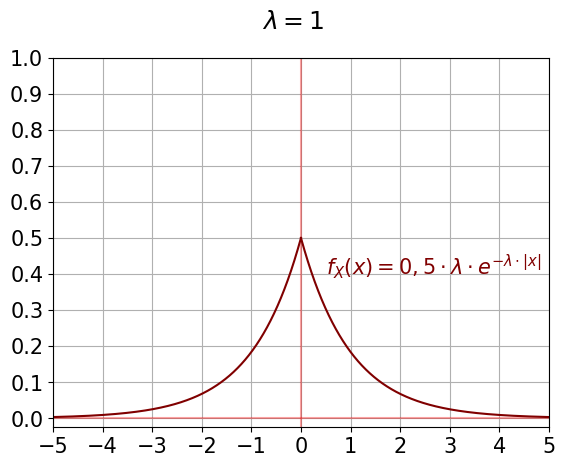

In [ ]:
x1 = np.linspace(-5, 0, 10_000)
y1 = np.exp(x1)/2

x2 = np.linspace(0, 5, 10_000)
y2 = np.exp(-x2)/2

plt.subplot()
plt.axvline(x=0, color='r', alpha=0.35)
plt.axhline(y=0, color='r', alpha=0.35)
plt.plot(x1, y1, color='maroon')
plt.plot(x2, y2, color='maroon')
plt.xlim((-5, 5))
plt.grid()
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(0, 1+0.1, 0.1))
plt.text(0.5,0.4,"$f_X(x)=0,5 \cdot \lambda\cdot e^{-\lambda \cdot|x|}$", color ='maroon')
plt.suptitle("$\lambda = 1$")


plt.show()

2.
$$
\begin{equation*}
 \boxed{F(x) } =
 \begin{cases}
  \int_{-\infty}^x f(t) dt, x\ge 0 \\
  \int_{-\infty}^x \cdot f(t) dt, x < 0
 \end{cases}=
  \begin{cases}
  \frac{\lambda}{2}\cdot (\int_{-\infty}^0e^{λt}dt +\int_{0}^x e^{−λt}dt), x\ge 0 \\
  \frac{\lambda}{2}\cdot \int_{-\infty}^x e^{λt} dt, x < 0
 \end{cases} =
  \begin{cases}
  \frac{\lambda}{2}\cdot (\frac{1}{\lambda}\cdot  e^{−λt}\Bigg|_{-\infty}^0-\frac{1}{\lambda}\cdot  e^{−λt}\Bigg|_{0}^x), x\ge 0 \\
  \frac{\lambda}{2}\cdot \frac{1}{\lambda}\cdot  e^{λt}\Bigg|_{-\infty}^x, x < 0
 \end{cases}=
 \boxed{
  \begin{cases}
  -\frac{1}{2}\cdot  e^{−λx} + 1, x\ge 0 \\
  \frac{1}{2}\cdot  e^{λx}, x < 0
 \end{cases}}
\end{equation*}
$$

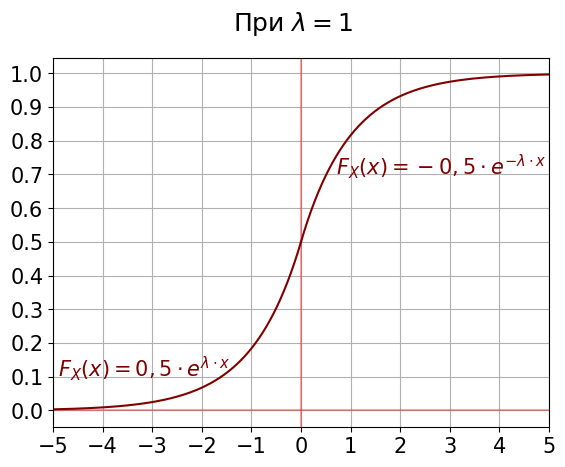

In [ ]:
x1 = np.linspace(-5, 0, 10_000)
y1 = np.exp(x1)/2

x2 = np.linspace(0, 5, 10_000)
y2 = (-1)*np.exp(-x2)/2 + 1

plt.subplot()
plt.axvline(x=0, color='r', alpha=0.35)
plt.axhline(y=0, color='r', alpha=0.35)
plt.plot(x1, y1, color='maroon')
plt.plot(x2, y2, color='maroon')
plt.xlim((-5, 5))
plt.grid()
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(0, 1+0.1, 0.1))
plt.text(-4.9,0.1,"$F_X(x)=0,5 \cdot e^{\lambda \cdot x}$", color ='maroon')
plt.text(0.7,0.7,"$F_X(x)=-0,5 \cdot e^{-\lambda \cdot x}$", color ='maroon')
plt.suptitle("При $\lambda = 1$")

plt.show()

3.
$$
\begin{equation*}
\boxed{\mathbb{E}(x)} =
\int_{-\infty}^\infty x\cdot f(x) dx=
\int_{-\infty}^\infty x\cdot\frac{\lambda}{2}\cdot e^{λ|x|} dx =
\frac{\lambda}{2}\cdot\Bigg( \int_{-\infty}^0 x\cdot e^{λ\cdot x} dx +\int_{0}^\infty  x\cdot e^{-λ\cdot x} dx\Bigg) =
\frac{\lambda}{2} \cdot \Bigg(\frac{x}{\lambda}\cdot e^{\lambda\cdot x}\Big|_{-\infty}^0 -\int_{-\infty}^0 \frac{1}{\lambda}\cdot e^{λ\cdot x} dx - \frac{x}{\lambda}\cdot e^{-\lambda\cdot x}\Big|_{0}^\infty -\int_{0}^\infty  -\frac{1}{\lambda}\cdot e^{-λ\cdot x} dx\Bigg) =
\frac{1}{2}\cdot \Bigg(0 - 0 - \frac{1}{\lambda} \cdot e^{\lambda\cdot x}\bigg|_{-\infty}^0 - \frac{1}{\lambda} \cdot e^{-\lambda\cdot x}\bigg|_{0}^\infty\Bigg)=\\ =
\frac{1}{2}\cdot \Bigg(0 - 0 + \frac{1}{\lambda} -  \frac{1}{\lambda}\Bigg) =
\boxed{0}
\end{equation*}
$$

4.
$$
\begin{equation*}
\boxed{\mathbb{Var}(x)} =
\int_{-\infty}^\infty (x - \mathbb{E}(x))^2 *f(x) dx =
\int_{-\infty}^0 x^2 \cdot \frac{\lambda}{2} \cdot e^{\lambda \cdot x} dx + \int_0^{\infty} x^2 \cdot \frac{\lambda}{2} \cdot e^{-\lambda \cdot x} dx =
\frac{e^{\lambda \cdot x} \cdot(\lambda^2\cdot x^2 - 2\cdot \lambda \cdot x + 2)}{2 \cdot \lambda^2} \bigg|_{-\infty}^0 - \frac{e^{-\lambda \cdot x} \cdot(\lambda^2\cdot x^2 - 2\cdot \lambda \cdot x + 2)}{2 \cdot \lambda^2} \bigg|_0^{\infty} =
\frac{1}{\lambda^2} + \frac{1}{\lambda^2} = \boxed{\frac{2}{\lambda^2}}
\end{equation*}
$$

# 2

Случайная величина $X$ имеет плотность распределения $f(x) = \frac{1}{π}\frac{1}{1+x^2}$(стандартное распределение Коши $Co(0; 1)$). Найдите вероятности:

1. $\mathbb{P}(X > 1)$;
2. $\mathbb{P}(|X| > 1)$.



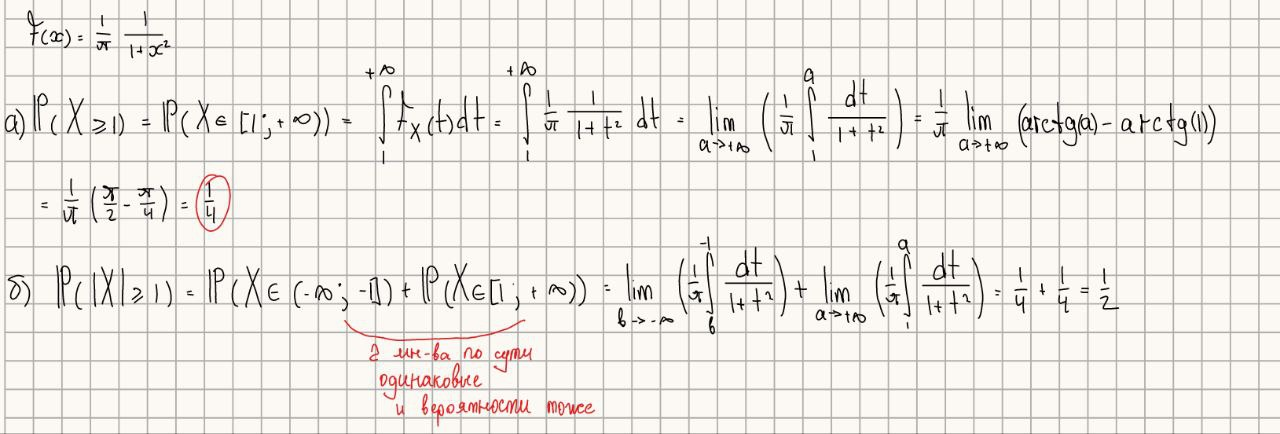

In [ ]:
X = cauchy(0,1)

In [ ]:
X.sf(1)

0.25

In [ ]:
X.sf(1)+X.cdf(-1)

0.5

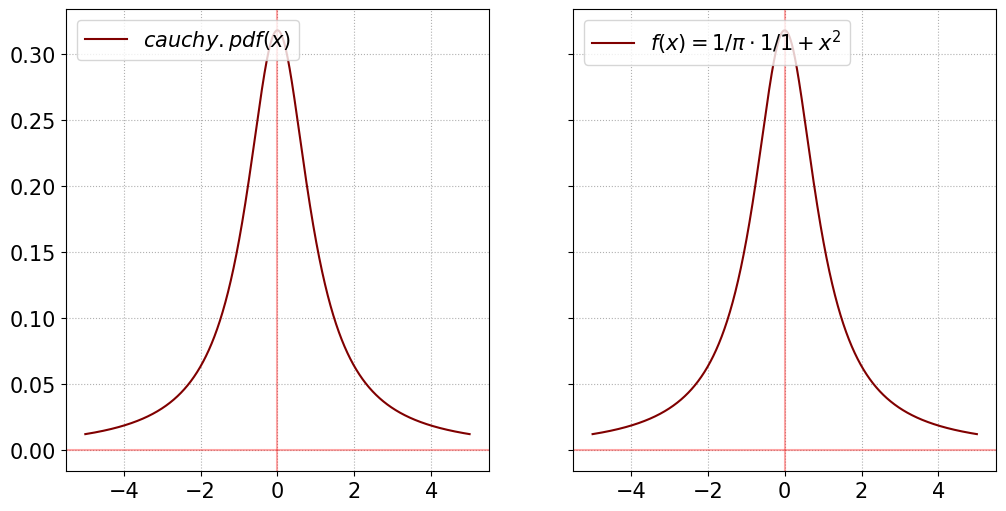

In [ ]:
def fbigrrX(x,a,b):
  return (1/np.pi)*1/(1+x**2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6),sharey=True)
x = np.linspace(-5, 5, 10_000)

axes[0].axvline(x=0, color='r', alpha=0.35)
axes[0].axhline(y=0, color='r', alpha=0.35)
axes[0].plot(x, cauchy.pdf(x), color='maroon', label="$cauchy.pdf(x)$")
axes[0].grid(ls=':')
axes[0].legend(loc='upper left')

axes[1].axvline(x=0, color='r', alpha=0.35)
axes[1].axhline(y=0, color='r', alpha=0.35)
axes[1].plot(x, [fbigrrX(i,0,1) for i in x], color='maroon', label="$f(x) = 1/\pi \cdot {1}/{1+x^2} $")
axes[1].grid(ls=':')
axes[1].legend(loc='upper left')

plt.show()

# 3

Пусть случайные величины $X$ имеет показательное распределение с параметром $λ = \frac{1}{3}$. Найдите вероятности:
1. $\mathbb{P}(X > 3)$
2. $\mathbb{P}(X > 6|X > 3)$
3. $\mathbb{P}(X > t + 3|X > t)$

In [ ]:
X = expon(scale=3)
X.sf(3)

0.36787944117144233

In [ ]:
X.sf(6)/X.sf(3)

0.36787944117144233

In [ ]:
m=set()
for t in range(35):
  m.add(rrstr((X.sf(t+3)) / ( X.sf(t)),3))
m

{'0,368'}

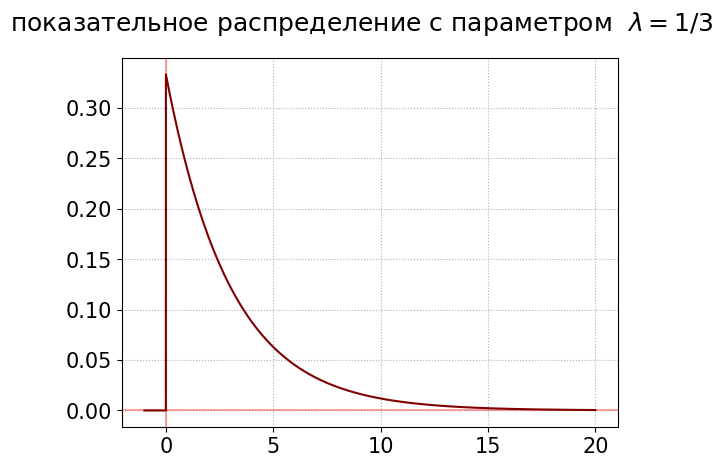

In [ ]:
x = np.linspace(-1, 20, 10_000)

plt.subplot()
plt.axvline(x=0, color='r', alpha=0.35)
plt.axhline(y=0, color='r', alpha=0.35)
plt.plot(x, expon(scale=3).pdf(x), color='maroon')

plt.grid(ls=':')

plt.suptitle("показательное распределение с параметром  $λ=1/3$")


plt.show()

# 4

Пусть $X$ – случайная величина, равномерно распределенная на $[−1; 1]$. Найдите распределение случайной величины $Y = |X|$.

$$
f(x) = \frac{1}{1-(-1)} = \frac{1}{2}\\
Y=|X|=\begin{cases}
  X,\space x \in [0;1] \\
  -X,\space x \in [-1;0)
 \end{cases}\\
y=\phi(x)=|x|=\begin{cases}
  x,\space x \in [0;1] \\
  -x,\space x \in [-1;0)
 \end{cases}\\
1)\space \psi_1(y) = y;\space \psi^{’}_1(y)=1\\
f(\psi_1(y))=\frac{1}{2}\\
g_1(y) = f(\psi_1(y))\cdot |\psi^{’}_1(y)| = \frac{1}{2}\cdot 1 = \frac{1}{2}\\
2)\space \psi_2(y) = -y;\space \psi^{’}_2(y)=-1\\
f(\psi_2(y))=\frac{1}{2}\\
g_2(y) = f(\psi_2(y))\cdot |\psi^{’}_2(y)| = \frac{1}{2}\cdot 1 = \frac{1}{2}\\
g(y) = g_1(y) + g_2(y) = \frac{1}{2} + \frac{1}{2} = 1\\
На\space отрезке:-1 \le x\le 1 \Rightarrow 0\le y\le 1\\
g(y)=\begin{cases}
  1,\space y \in [0;1] \\
  0,\space y \notin [0;1]
 \end{cases}\\
G(y)=\int_{-\infty}^yg(y)dy=\int_0^y1dy=y\\
G(y)=\begin{cases}
  0,\space y < 0 \\
  y,\space y \in [0;1]\\
  1,\space y > 1
 \end{cases}\\
$$

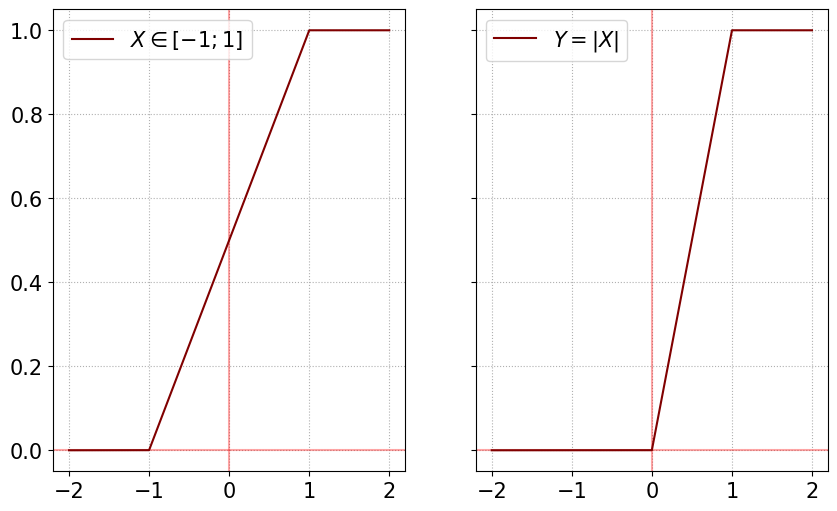

In [ ]:
def fbigrrX(x,a,b):
  if x<a:
    return 0
  elif x>=b:
    return 1
  else:
    return (x-a)/(b-a)

def fbigrrY(y,a,b):
  if y<a:
    return 0
  elif y>=b:
    return 1
  else:
    return y

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6),sharey=True)
x = np.linspace(-2, 2, 10_000)

axes[0].axvline(x=0, color='r', alpha=0.35)
axes[0].axhline(y=0, color='r', alpha=0.35)
axes[0].plot(x, [fbigrrX(i,-1,1) for i in x], color='maroon', label="$X \in [−1; 1]$")
axes[0].grid(ls=':')
axes[0].legend()

axes[1].axvline(x=0, color='r', alpha=0.35)
axes[1].axhline(y=0, color='r', alpha=0.35)
axes[1].plot(x, [fbigrrY(i,0,1) for i in x], color='maroon', label="$Y = |X|$")
axes[1].grid(ls=':')
axes[1].legend()

plt.show()

# 5

Случайная величина $X$ равномерно распределена на отрезке $[0; 1]$. Найдите плотность распределения случайной величины:
1. $Y = X^2$
2. $Y = \frac{1}{X}$
3. $Y = e^X$

и построить их графики.

$$
f(x) = \frac{1}{1-0} = 1\\
$$
$
1)
$
$$
\space Y=X^2\\
y=\phi(x)=x^2\\
\psi(y) = \sqrt{y};\space \psi^{’}(y)=\frac{1}{2\sqrt{y}}\\
f(\psi(y))=1\\
g(y) = f(\psi(y))\cdot |\psi^{’}(y)| = 1\cdot \frac{1}{2\sqrt{y}} = \frac{1}{2 \sqrt{y}}\\
На\space отрезке:0 \le x\le 1 \Rightarrow 0\le y\le 1\\
g(y)=\begin{cases}
  \frac{1}{2\sqrt{y}},\space y \in [0;1] \\
  0,\space y \notin [0;1]
 \end{cases}\\
$$
$
2)
$
$$
\space Y=\frac{1}{X}\\
y=\phi(x)=\frac{1}{x}\\
\psi(y) = \frac{1}{y};\space \psi^{’}(y)=-\frac{1}{y^2}\\
f(\psi(y))=1\\
g(y) = f(\psi(y))\cdot |\psi^{’}(y)| = 1\cdot \frac{1}{y^2} = \frac{1}{y^2}\\
На\space отрезке:0 \le x\le 1 \Rightarrow 1\le y\le +\infty\\
g(y)=\begin{cases}
  \frac{1}{y^2},\space y \in [1;+\infty] \\
  0,\space y \notin [1;+\infty]
 \end{cases}\\
$$
$
3)
$
$$
\space Y=e^X\\
y=\phi(x)=e^x\\
\psi(y) = ln(y);\space \psi^{’}(y)=\frac{1}{y}\\
f(\psi(y))=1\\
g(y) = f(\psi(y))\cdot |\psi^{’}(y)| = 1\cdot \frac{1}{y} = \frac{1}{y}\\
На\space отрезке:0 \le x\le 1 \Rightarrow 1\le y\le e\\
g(y)=\begin{cases}
  \frac{1}{y},\space y \in [1;e] \\
  0,\space y \notin [1;e]
 \end{cases}\\
$$

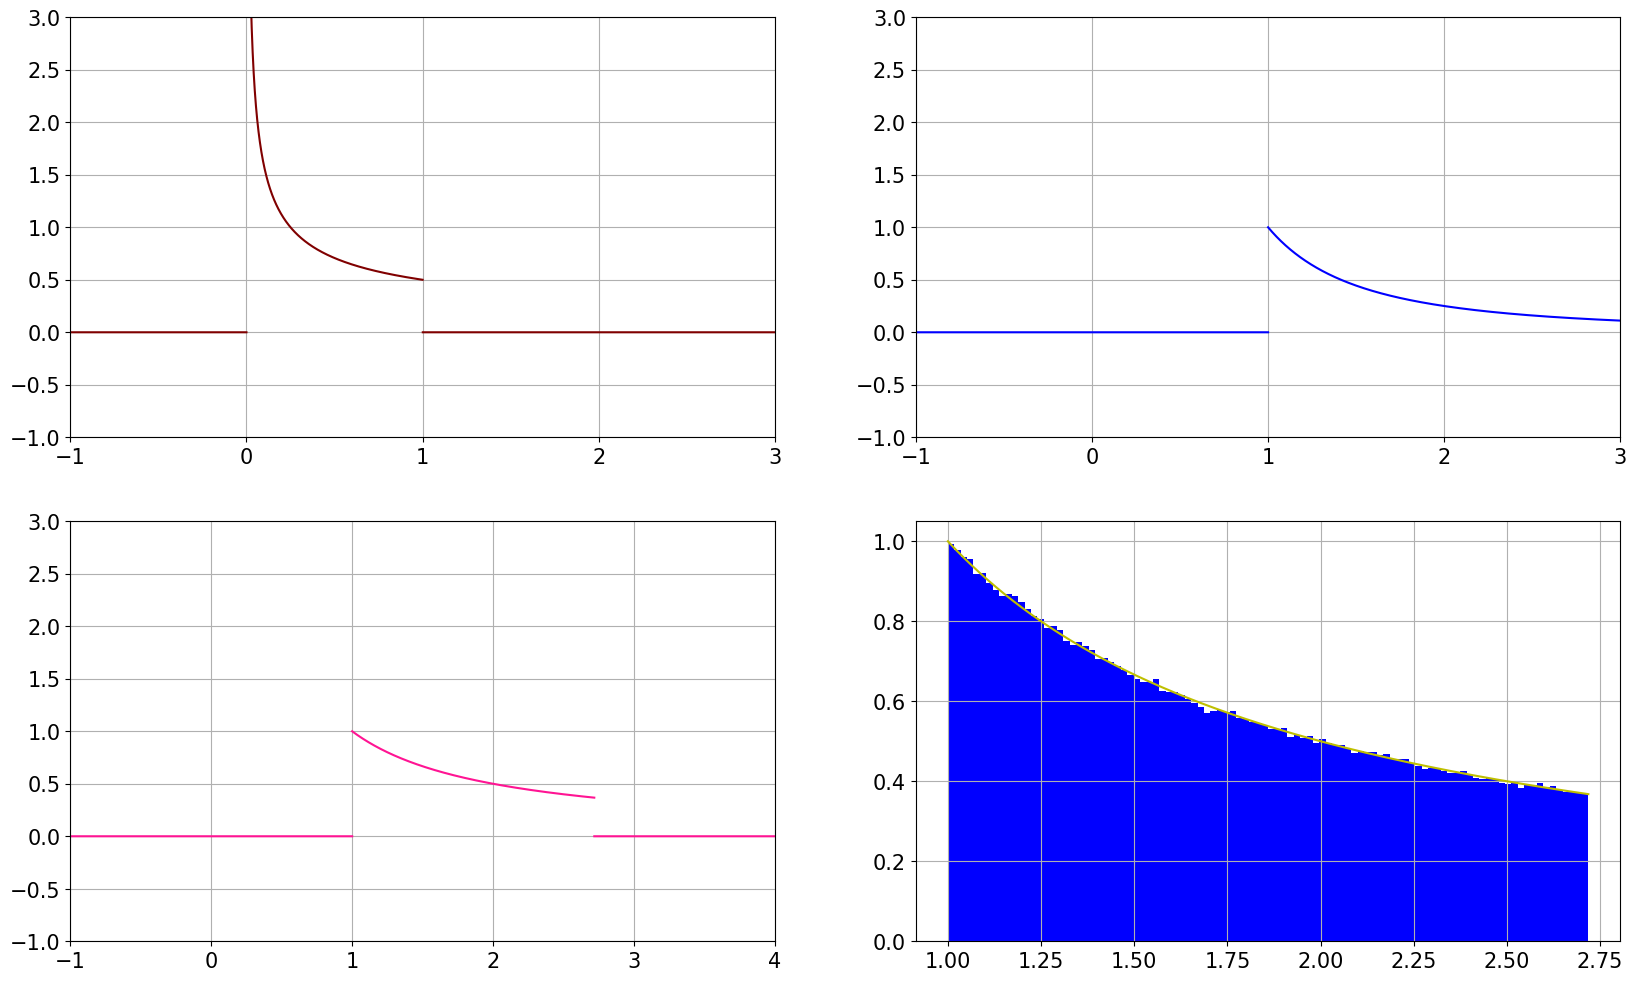

In [ ]:
N = 10_000
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

axes[0][0].plot(np.linspace(-1, -0.0001, N), [0]*N, color='maroon')
axes[0][0].plot(np.linspace(0, 1, N), np.linspace(0.0001, 1, N)**-(1/2)/2, color='maroon', label='1')
axes[0][0].plot(np.linspace(1.001, 3, N), [0]*N, color='maroon')
axes[0][0].set_ylim((-1, 3))
axes[0][0].set_xlim((-1, 3))
axes[0][0].set_xticks(np.arange(-1, 4, 1.0))
axes[0][0].grid()

axes[0][1].plot(np.linspace(-1, 1, N), [0]*N, color='b')
axes[0][1].plot(np.linspace(1, 3, N), np.linspace(1, 3, N)**-2, color='b', label='2')
axes[0][1].set_ylim((-1, 3))
axes[0][1].set_xlim((-1, 3))
axes[0][1].set_xticks(np.arange(-1, 4, 1.0))
axes[0][1].grid()

axes[1][0].plot(np.linspace(-1, 1, N), [0]*N, color='deeppink')
axes[1][0].plot(np.linspace(1, np.e, N), np.linspace(1, np.e, N)**-1, color='deeppink', label='3')
axes[1][0].plot(np.linspace(np.e, 4, N), [0]*N, color='deeppink')
axes[1][0].set_ylim((-1, 3))
axes[1][0].set_xlim((-1, 4))
axes[1][0].set_xticks(np.arange(-1, 5, 1.0))
axes[1][0].grid()

X = uniform()
axes[1][1].hist(np.exp(X.rvs(size=1_000_000)),bins =100,density =True, color='b', label='3')
axes[1][1].plot(np.linspace(1,np.e,10_000),np.linspace(1,np.e,10_000)**-1,color='y')
axes[1][1].grid()

'''axes[0].legend()
axes[1].legend()
axes[2].legend()'''
plt.show()

# 6

Плотность распределения случайной величины $X$ равна $f(x) = \frac{1}{\pi}\frac{1}{1+x^2}$. Найдите распределение случайной величины $Y = arctg(X)$.


$$
f(x) = \frac{1}{\pi(1+x^2)}\\
Y=arctg(X)\\
y=\phi(x)=arctg(x)\\
\space \psi(y) = tg(y);\space \psi^{’}(y)=\frac{1}{cos^2y}\\
f(\psi(y))=\frac{1}{\pi(1+tg^2y)}=\frac{cos^2y}{\pi}\\
g(y) = f(\psi(y))\cdot |\psi^{’}(y)| = \frac{cos^2y}{\pi}\cdot \frac{1}{cos^2y} = \frac{1}{\pi}\\
На\space отрезке:-\infty \le x\le \infty \Rightarrow -\frac{\pi}{2}\le y\le \frac{\pi}{2}\\
g(y)=\begin{cases}
  \frac{1}{\pi},\space y \in [-\frac{\pi}{2};\frac{\pi}{2}] \\
  0,\space y \notin [-\frac{\pi}{2};\frac{\pi}{2}]
 \end{cases}\\
G(y)=\int_{-\infty}^yg(y)dy=\int_{-\frac{\pi}{2}}^y\frac{1}{\pi}dy=\frac{y}{\pi} + \frac{1}{2}\\
G(y)=\begin{cases}
  0,\space y < -\frac{\pi}{2} \\
  \frac{y}{\pi} + \frac{1}{2},\space y \in [-\frac{\pi}{2};\frac{\pi}{2}]\\
  1,\space y > \frac{\pi}{2}
 \end{cases}\\
$$

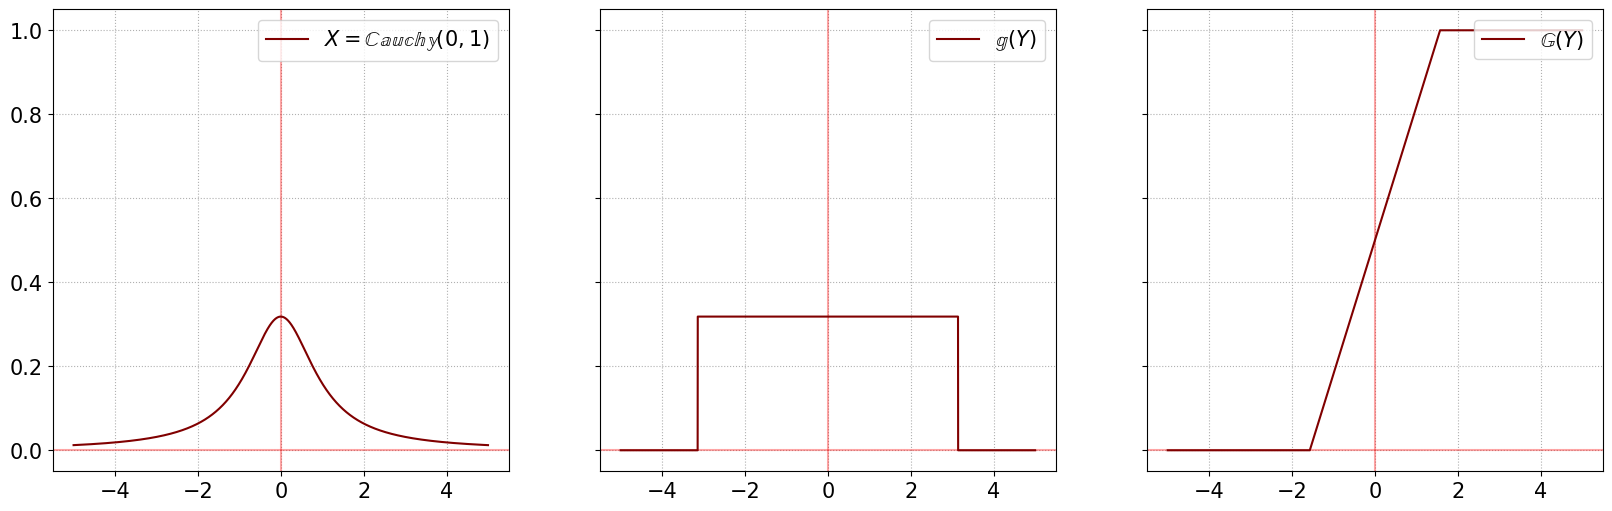

In [ ]:
def fbigrryy(x,a,b):
  if x<-np.pi or x>np.pi:
    return 0
  else:
    return (1/np.pi)

def fbigrrY(y,a,b):
  if y<a:
    return 0
  elif y>=b:
    return 1
  else:
    return y/np.pi + 0.5

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6),sharey=True)
x = np.linspace(-5, 5, 10_000)

axes[0].axvline(x=0, color='r', alpha=0.35)
axes[0].axhline(y=0, color='r', alpha=0.35)
axes[0].plot(x, cauchy.pdf(x), color='maroon', label="$X = \mathbb{Cauchy}(0,1)$")
axes[0].grid(ls=':')
axes[0].legend(loc='upper right')

axes[1].axvline(x=0, color='r', alpha=0.35)
axes[1].axhline(y=0, color='r', alpha=0.35)
axes[1].plot(x, [fbigrryy(i,0,1) for i in x], color='maroon', label="$\mathbb{g}(Y)$")
axes[1].grid(ls=':')
axes[1].legend(loc='upper right')

axes[2].axvline(x=0, color='r', alpha=0.35)
axes[2].axhline(y=0, color='r', alpha=0.35)
axes[2].plot(x, [fbigrrY(i,-np.pi/2,np.pi/2) for i in x], color='maroon', label="$\mathbb{G}(Y)$")
axes[2].grid(ls=':')
axes[2].legend(loc='upper right')

plt.show()

# 7

Случайная величина $X$ равномерно распределена на отрезке $[0; 2]$. Найдите функцию распределения случайной величины$ Y = |X − 1|$.

$$
f(x) = \frac{1}{2-0} = \frac{1}{2}\\
Y=|X-1|=\begin{cases}
  X,\space x \in [1;2] \\
  -X,\space x \in [0;1)
 \end{cases}\\
y=\phi(x)=|x-1|=\begin{cases}
  x-1,\space x \in [1;2] \\
  -x+1,\space x \in [0;1)
 \end{cases}\\
\psi(x)=\begin{cases}
  y+1,\space x \in [1;2] \\
  -y+1,\space x \in [0;1)
 \end{cases}\\
1)\space \psi_1(y) = y+1;\space \psi^{’}_1(y)=1\\
f(\psi_1(y))=\frac{1}{2}\\
g_1(y) = f(\psi_1(y))\cdot |\psi^{’}_1(y)| = \frac{1}{2}\cdot 1 = \frac{1}{2}\\
2)\space \psi_2(y) = -y+1;\space \psi^{’}_2(y)=-1\\
f(\psi_2(y))=\frac{1}{2}\\
g_2(y) = f(\psi_2(y))\cdot |\psi^{’}_2(y)| = \frac{1}{2}\cdot 1 = \frac{1}{2}\\
g(y) = g_1(y) + g_2(y) = \frac{1}{2} + \frac{1}{2} = 1\\
На\space отрезке:0 \le x\le 2 \Rightarrow 0\le y\le 1\\
g(y)=\begin{cases}
  1,\space y \in [0;1] \\
  0,\space y \notin [0;1]
 \end{cases}\\
G(y)=\int_{-\infty}^yg(y)dy=\int_0^y1dy=y\\
G(y)=\begin{cases}
  0,\space y < 0 \\
  y,\space y \in [0;1]\\
  1,\space y > 1
 \end{cases}\\
$$

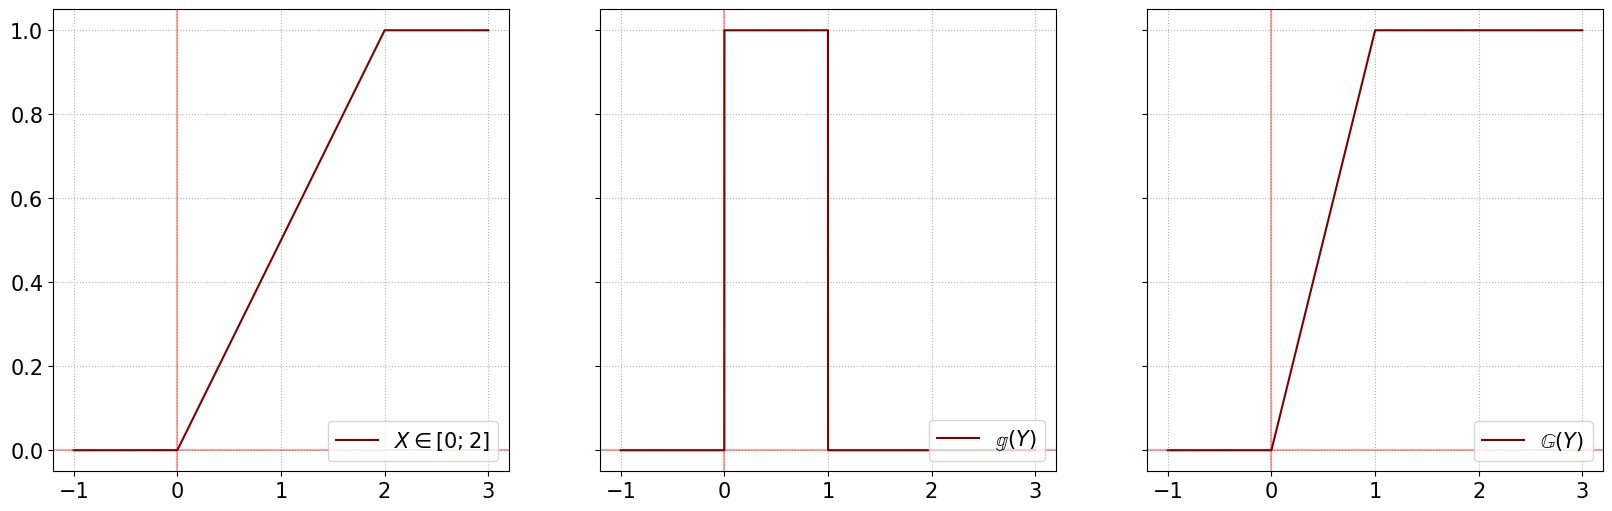

In [ ]:
def fbigrrX(x,a,b):
  if x<a:
    return 0
  elif x>=b:
    return 1
  else:
    return (x-a)/(b-a)

def fbigrryy(x,a,b):
  if x<a or x>b:
    return 0
  else:
    return 1

def fbigrrY(y,a,b):
  if y<a:
    return 0
  elif y>=b:
    return 1
  else:
    return y

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6),sharey=True)
x = np.linspace(-1, 3, 10_000)

axes[0].axvline(x=0, color='r', alpha=0.35)
axes[0].axhline(y=0, color='r', alpha=0.35)
axes[0].plot(x, [fbigrrX(i,0,2) for i in x], color='maroon', label="$X \in [0;2]$")
axes[0].grid(ls=':')
axes[0].legend(loc='lower right')

axes[1].axvline(x=0, color='r', alpha=0.35)
axes[1].axhline(y=0, color='r', alpha=0.35)
axes[1].plot(x, [fbigrryy(i,0,1) for i in x], color='maroon', label="$\mathbb{g}(Y)$")
axes[1].grid(ls=':')
axes[1].legend(loc='lower right')

axes[2].axvline(x=0, color='r', alpha=0.35)
axes[2].axhline(y=0, color='r', alpha=0.35)
axes[2].plot(x, [fbigrrY(i,0,1) for i in x], color='maroon', label="$\mathbb{G}(Y)$")
axes[2].grid(ls=':')
axes[2].legend(loc='lower right')

plt.show()

# 8

Случайная величина $X$ равномерно распределена на отрезке $[a; b]$. Найдите $a$ и $b$, если $\mathbb{E}(X^2
) = 1~ и~ \mathbb{E}(X) = -\mathbb{E}(X^3
)$.

$$
ЕСЛИ~ МИНУС~ -~ ОШИБКА\\
f(x)=\frac{1}{b-a}\\
\mathbb{E}(X^2)=\int_{-\infty}^{\infty}x^2f(x)dx=\int_a^b\frac{x^2}{b-a}dx=\frac{1}{b-a}\cdot\frac{x^3}{3}\Bigg|_{a}^b=\frac{1}{3(b-a)}\cdot(b^3-a^3)=\\=\frac{1}{3(b-a)}\cdot(b-a)(b^2+ab+a^2)=\frac{b^2+ab+a^2}{3}=1\Rightarrow\\
\Rightarrow b^2+ab+a^2 = 3\\
\mathbb{E}(X) = -\mathbb{E}(X^3)\\
\int_{-\infty}^{\infty}xf(x)dx=-\int_{-\infty}^{\infty}x^3f(x)dx\\
\int_{a}^{b}xdx=-\int_{a}^{b}x^3dx\\
\frac{x^2}{2}\Bigg|_{a}^b=-\frac{x^4}{4}\Bigg|_{a}^b\\
2(b^2-a^2)=-(b^4-a^4)\\
2(b^2-a^2)=-(b^2-a^2)(b^2+a^2)\\
2=-(b^2+a^2)\\
\begin{cases}
  b^2+ab+a^2 = 3\\
  b^2+a^2=-2\\
 \end{cases}\\
 ~\\
 ab = 1 => b=\frac{1}{a}\\
 a^2 + \frac{1}{a^2}-2=0\\
 a^2 = 1\\
 \begin{cases}
  a^2 = 1\\
  ab = 1\\
\end{cases}\\
a = 1,~b = 1\\
НО!~a=b~ =>~ \mathbb{E}(X^2) = 0~ -~ ПРОТИВОРЕЧИЕ~ УСЛОВИЮ!\\
$$
ОТВЕТ: Такое распределение не существует

# 9

Случайная величина X равномерно распределена на отрезке $[0; 1]$. Найдите $ρ(X; X^3
)$.

$$
f(x)=\frac{1}{1-0}=1\\
\rho(X;X^3)=\frac{Cov(X;X^3)}{\sigma(X)\sigma(X^3)}\\
\mathbb{E}(X)=\int_{-\infty}^{\infty}xf(x)dx=\int_0^1xdx=\frac{x^2}{2}\Bigg|_{0}^1=\frac{1}{2}\\
\mathbb{E}(X^3)=\int_{-\infty}^{\infty}x^3f(x)dx=\int_0^1x^3dx=\frac{x^4}{4}\Bigg|_{0}^1=\frac{1}{4}\\
\mathbb{E}(X\cdot X^3)=\mathbb{E}(X^4)=\int_{-\infty}^{\infty}x^4f(x)dx=\int_0^1x^4dx=\frac{x^5}{5}\Bigg|_{0}^1=\frac{1}{5}\\
Cov(X;X^3)=\mathbb{E}(X^4)-\mathbb{E}(X)\cdot \mathbb{E}(X^3)=\frac{1}{5} - \frac{1}{2}\cdot \frac{1}{4} = \frac{3}{40}\\
Var(X)=\int_{-\infty}^{\infty}x^2f(x)dx - \mathbb{E}^2(X)=\int_0^1x^2f(x)dx - \mathbb{E}^2(X)=\frac{x^3}{3}\Bigg|_{0}^1 - (\frac{1}{2})^2=\frac{1}{3}-\frac{1}{4}=\frac{1}{12}\\
Var(X^3)=\int_{-\infty}^{\infty}(x^3-\mathbb{E}(X^3))^2f(x)dx=\int_0^1(x^6-2\mathbb{E}(X^3)x^3+\mathbb{E}^2(X^3))f(x)dx\\=(\frac{x^7}{7}-\frac{x^4}{8}-\frac{x}{16})\Bigg|_{0}^1=\frac{1}{7}-\frac{1}{8}+\frac{1}{16}=\frac{9}{112}\\
\sigma(X)=\sqrt{Var(X)}=\frac{1}{2\sqrt{3}}\\
\sigma(X^3)=\sqrt{Var(X^3)}=\frac{3}{4\sqrt{7}}\\
\rho(X;X^3)=\frac{3}{40}\cdot \frac{2\sqrt{3}}{1}\cdot \frac{4\sqrt{7}}{3}=\frac{\sqrt{21}}{5}\approx0.916515
$$

In [ ]:
x = np.linspace(0, 1, 1_000_000)
x_3 = x**3
np.corrcoef(x, x_3)[0][1]

0.916515037156339

# 10

Случайная величина $X$ имеет стандартное распределение **Коши**, $X ∼ Ca(0; 1)$, то есть, плотность $f(x) = \frac{1}{π(1+x^2)}$. Найдите плотность распределения случайной величины $Y =
\frac{X^2}{1+X^2}$


$$
f(x) = \frac{1}{π(1+x^2)}\\
Y =\frac{X^2}{1+X^2}\\
y=\phi(x)=\frac{x^2}{1+x^2}\\
\psi_1(y)=\sqrt{\frac{y}{1-y}};\space \psi_1^{'}(y)=\frac{1}{2\sqrt{y}\cdot\sqrt{1-y}\cdot(1-y)}\\
f(\psi_1(y))=\frac{1}{π(1+\frac{y}{1-y})}=\frac{1-y}{\pi}\\
g_1(y) = f(\psi_1(y))\cdot |\psi_1^{’}(y)|=\frac{1-y}{\pi}\cdot\frac{1}{2\sqrt{y}\cdot\sqrt{1-y}\cdot(1-y)}=\frac{1}{2\pi\sqrt{y-y^2}}\\
\psi_2(y)=-\sqrt{\frac{y}{1-y}};\space \psi_2^{'}(y)=-\frac{1}{2\sqrt{y}\cdot\sqrt{1-y}\cdot(1-y)}\\
f(\psi_2(y))=\frac{1}{π(1+\frac{y}{1-y})}=\frac{1-y}{\pi}\\
g_2(y) = f(\psi_2(y))\cdot |\psi_2^{’}(y)|=\frac{1-y}{\pi}\cdot\frac{1}{2\sqrt{y}\cdot\sqrt{1-y}\cdot(1-y)}=\frac{1}{2\pi\sqrt{y-y^2}}\\
g(y)=g_1(y)+g_2(y)=\frac{1}{\pi\sqrt{y-y^2}}\\
на\space отрезке: -\infty \le x \le +\infty \Rightarrow 0 \le y \le 1\\
G(y)=\int_{\infty}^y\frac{dy}{\pi\sqrt{y-y^2}}=-\frac{2\arcsin(\sqrt{1-y})}{\pi}+1\\
G(y)=\begin{cases}
  0,\space y < 0 \\
  -\frac{2\arcsin(\sqrt{1-y})}{\pi}+1,\space y \in [0;1]\\
  1,\space y > 1
 \end{cases}\\
$$

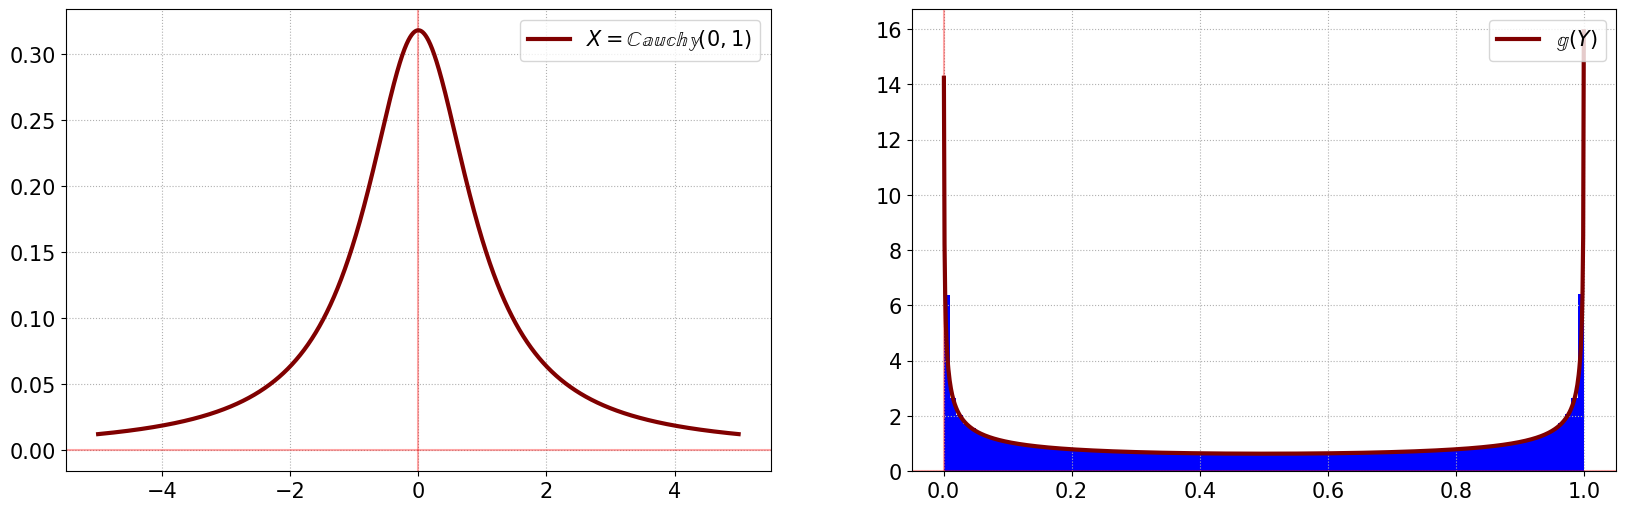

In [ ]:
def fbigrryy(x,a,b):
  if x<a or x>b:
    return 
  else:
    return (1/np.pi) * (1/np.sqrt(x - x**2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
x = np.linspace(-5, 5, 10_000)

axes[0].axvline(x=0, color='r', alpha=0.35)
axes[0].axhline(y=0, color='r', alpha=0.35)
axes[0].plot(x, cauchy.pdf(x), color='maroon', label="$X = \mathbb{Cauchy}(0,1)$",lw=3)
axes[0].grid(ls=':')
axes[0].legend(loc='upper right')

axes[1].axvline(x=0, color='r', alpha=0.35)
axes[1].axhline(y=0, color='r', alpha=0.35)
axes[1].plot(x, [fbigrryy(i,0,1) for i in x], color='maroon', label="$\mathbb{g}(Y)$",lw=3)
axes[1].hist((t:= cauchy().rvs(size = 1_000_000)**2)/(1+t), color = 'b', density=True,bins = 100)
axes[1].grid(ls=':')
axes[1].legend(loc='upper right')



plt.show()


# 11

Случайная величина $X$ распределена по показательному закону c параметром $λ = 1$. Найдите распределение случайной величины $Y = [X]^2$,где $[x]$ обозначает целую часть $x$.


$$
f_X(x) =
\begin{cases}
0, ~если~ x < 0;\\
λe^{−λx}, если x > 0
\end{cases}\\
В~нашем~случае:
f_X(x) =
\begin{cases}
0, ~если~ x < 0;\\
e^{−x},~ если~ x > 0
\end{cases}\\
$$

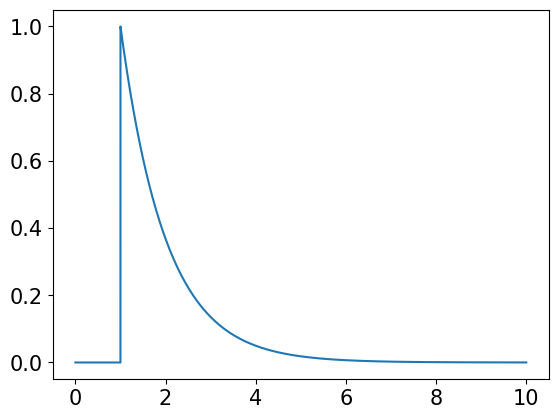

In [ ]:
N = 10_000

x = np.linspace(0, 10, N)
fx = expon(1).pdf(x)

plt.plot(x, fx)
plt.show()

In [ ]:
sum(y)

In [ ]:
y1 = []

c = 1
sm = 0

for i in range(N-1):
    if int(x[i])==int(x[i+1]):
        c += 1
        sm += np.e**(-x[i])
    
    else:
        y1.extend([sm/100]*(c))
        sm = 0
        c = 1
        
y1.append(sm)
    
sum(y1)/100

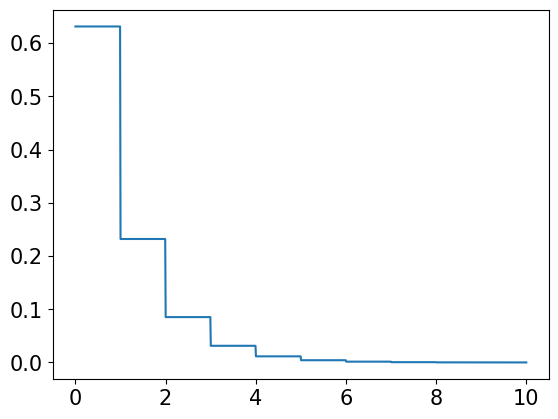

In [ ]:
plt.plot(x, y1)
plt.show()

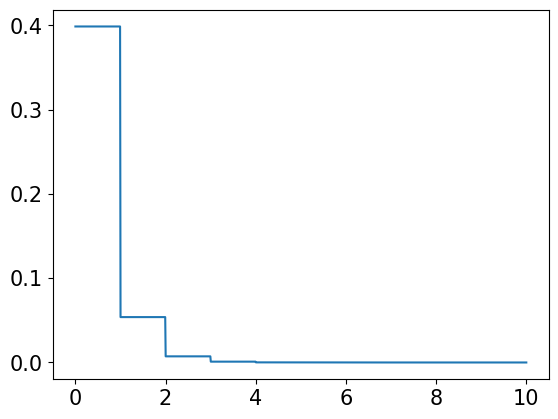

In [ ]:
y2 = np.array(y1)**2

plt.plot(x, y2)
plt.show()

# 12

Случайная величина $X$ распределена по показательному закону. Найдите
математическое ожидание $\mathbb{E}[(X−9)(10−X)]$, если дисперсия $\mathbb{Var}[10 − 4X] = 9$.

$$
X \space распределена \space по \space показательному
\space закону ⟷ f(x) =
\begin{cases}
\lambda e^{-\lambda \cdot x}, x\ge0\\
0, x<0
\end{cases}
$$

$$
\mathbb{E}(X) = \frac{1}{\lambda}, \ \mathbb{E}(X^2) = \frac{2}{\lambda ^ 2}, \ \mathbb{V}ar (X) = \frac{1}{\lambda ^ 2}
$$
$$
по \space условию: \mathbb{V}ar[10-4X] = 9
$$
$$\space$$
$$
\mathbb{V}ar [10-4X] = 0 + 16 \mathbb{V}ar(X) = 9
$$
$$
\mathbb{V}ar(X) = \frac{1}{\lambda^2} = \frac{9}{16}\\
\lambda = \frac{4}{3}
$$
$$\space$$
$$
\mathbb{E}(X) = \frac{1}{\lambda} = \frac{3}{4}\\
\mathbb{E}(X^2) = \frac{2}{\lambda^2} = \frac{18}{16}
$$

$$
\space
$$
$$
\mathbb{E}(-X^2 + 19X - 90) = -\mathbb{E}(X^2) + 19\mathbb{E}(X) - 90 = -76\frac{7}{8}
$$
$$\space$$
$$Ответ: \mathbb{E}(-X^2 + 19X - 90)= -76\frac{7}{8}$$

# 13

Случайная величина $X$ имеет распределение Коши с плотностью распределения $f(x) = \frac{b}{π[b^2+(x−a)^2]}$. Найдите плотность распределения случайной величины $Y = \frac{1}{X}$

$$
f(x) = \frac{b}{ \pi \cdot (b ^ 2 + (x-a) ^ 2)}
$$
$$
Y = \frac{1}{X} ⇒ y = \frac{1}{x} ⇒ x = \frac{1}{y} ⇒ \psi (y) = x = \frac{1}{y}
$$
$$
\psi \prime (y) = - \frac{1}{y^2}  
$$
$$
g(y) = функция\spaceплотности\space Y
$$
$$
g(y) = f(\psi(y)) \cdot |\psi\prime(y)|
$$
$$
\space
$$
$$
Ответ:
$$
$$
g(y) = \frac{b}{\pi \cdot (b^2 + (\frac{1}{y} - a)^2) \cdot y^2}
$$


# 14

Пусть с.в. $X ∼ Ca(1; 2)$. Найдите вероятность $\mathbb{P}(\frac{1}{X}> 3)$ и покажите статистическую устойчивость полученной вероятности.

$$
X \sim Ca(1,2) \Rightarrow f(x) = \frac{2}{[(x-1)^2 + 4] \cdot \pi}
$$
$$\space$$
$$
Определим \space Y = \frac{1}{X}, тогда:
$$
$$\space$$
$$
g(y) = \frac{2}{\pi \cdot [4 + (\frac{1}{y} - 1)^2] \cdot y^2}
$$
$$\space$$
$$\space$$
$$
\mathbb{P}(\frac{1}{X} > 3) = \mathbb{P}(Y > 3) = \int_{3}^{+\infty}g(y)dy =
$$
$$\space$$
$$
\frac{2}{\pi} \cdot \int_{3}^{+\infty} \frac{ydy}{4y^2+(1-y)^2} = \frac{2}{\pi} \cdot \int_{3}^{+\infty} \frac{ydy}{5y^2 - 2y + 1} = \frac{2}{\pi} \cdot \frac{1}{5} \cdot \frac{5}{2} \cdot arctg(\frac{y-\frac{1}{5}}{\frac{2}{5}}) \Bigg|_{3}^{+\infty} = \frac{1}{\pi} \cdot (\frac{\pi}{2} - arctg(7)) = \frac{1}{2} - \frac{1}{\pi}arctg(7)$$
$$\space$$
$$\space$$
$$
Ответ: \space\mathbb{P}(\frac{1}{X} > 3) = \frac{1}{2} - \frac{1}{\pi}arctg(7)
$$

Вероятность: 0.045197


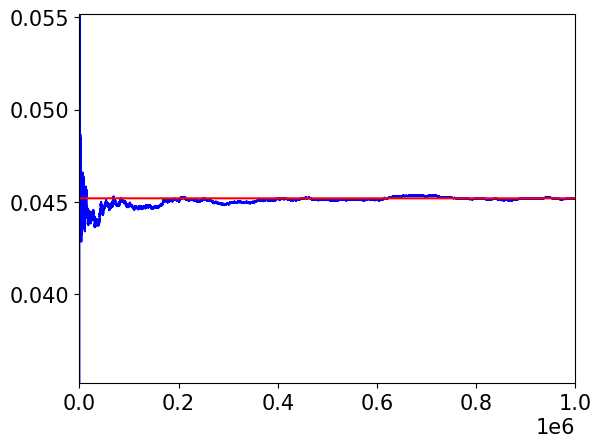

In [ ]:
#стат устойчивость
N = 1_000_000
x = list(range(N))
y = []
count=0
counter=0

f = cauchy(1,2)

for i in range(N):
  now = f.rvs()
  if (1/now > 3):
    counter+=1
  count+=1
  y.append(counter/count)


print('Вероятность:',counter/count)
plt.plot(x, y, c='b')
plt.plot(x, [counter/count] * len(y), c='r')
plt.ylim(counter/count - 0.01, counter/count + 0.01)
plt.xlim(0, len(x))
plt.show()

# 15

 На окружности радиуса $R$ берут две точки с равномерным распределением. Найдите функцию распределения расстояния $γ$ между ними и вычислите $\mathbb{E}(γ)$. <br><br>Используя инструментарий IPython, постройте график зависимости среднего значения расстояния от числа экспериментов для $R = 1$.
>(Можно использовать генератор $uniform.rvs( size=n)$ из библиотеки $from ~scipy.stats ~import ~uniform$)

Пусть R - радиус окружности\
Пусть первая точка A(R; 0)\
Пусть вторая точка B(x; y)\
\
$x^2 + y^2 = R^2$\
$|AB| = \sqrt{2R^2-2Rx}$

Пусть $\phi$ - угол между прямой $x=R$ и отрезком $AB$\
$\phi\in[0, \pi]$\
Тогда $2\phi$ - угол между OB и осью Ox

ТОГДА:\
$|AB|=\sqrt{2R^2 - 2R^2cos(2\phi)}$

$$
X \sim U([0, \pi])\\
f_X(x) = \begin{cases}
\frac{1}{\pi},~ x\in[0, \pi]\\
0, x\notin[0,~ \pi]\\
\end{cases}
$$

$$
g(x) = \sqrt{2R^2 - 2R^2cos(2\phi)} = \sqrt{2}R*\sqrt{1-cos(2\phi)}
$$

$$
EY = \int_{0}^{\pi}{g(x)*f_X(x)*d\phi} = \frac{1}{\pi}*\int_{0}^{\pi}{\sqrt{2}R*\sqrt{1-cos(2\phi)}}*d\phi = \frac{\sqrt{2}R}{\pi}\int_{0}^{\pi}{\sqrt{1-cos(2\phi)}}d\phi = \boxed{\frac{4R}{\pi}}
$$

**How to делать случайное распределение на окружности**

In [ ]:
# радиус окружности
circle_r = 1

# центр окружности (x, y)
circle_x = 0
circle_y = 0

# случайный угол
alpha = 2 * np.pi * rn.random()

# Случайное распределение точки на окружности
x = circle_r * np.cos(alpha) + circle_x
y = circle_r * np.sin(alpha) + circle_y
print("Random point", (x, y))

Random point (-0.09393896648649354, -0.9955779580602664)


**при равномерном распределении угла**

In [ ]:
N = 30_000
circle_r = 1
x = np.arange(1, N+1)
y = []
lengths = []
for n in x:
    alpha1 = 2 * np.pi * rn.random()
    x1 = circle_r * np.cos(alpha1)
    y1 = circle_r * np.sin(alpha1)

    alpha2 = 2 * np.pi * rn.random()
    x2 = circle_r * np.cos(alpha2)
    y2 = circle_r * np.sin(alpha2)

    lengths.append(np.sqrt((x2-x1)**2 + (y2-y1)**2))
    y.append(sum(lengths) / n)
y[-1]

1.2696974110154111

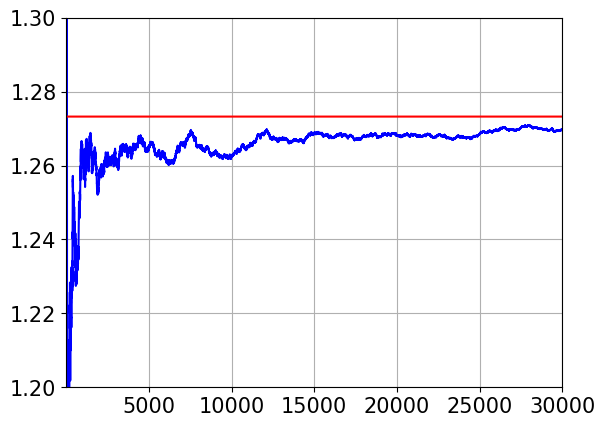

In [ ]:
plt.subplot()
plt.plot(x, y, color='b')
plt.plot(x, [4/np.pi]*N, color='r')
plt.ylim((1.2, 1.3))
plt.xlim((1, N))
plt.grid()
plt.show()

**При равномерном распределении x и зависящем от него y**

In [ ]:
N = 10_000
x = np.arange(1, N+1)
y = []
lengths = []
for n in x:
    x1 = uniform(-1, 1+1).rvs(size=1)[0]
    y1 = np.sqrt(1 - x1**2)

    lengths.append(np.sqrt((1-x1)**2 + (y1)**2))
    y.append(sum(lengths) / n)
y[-1]

1.3336089925713528

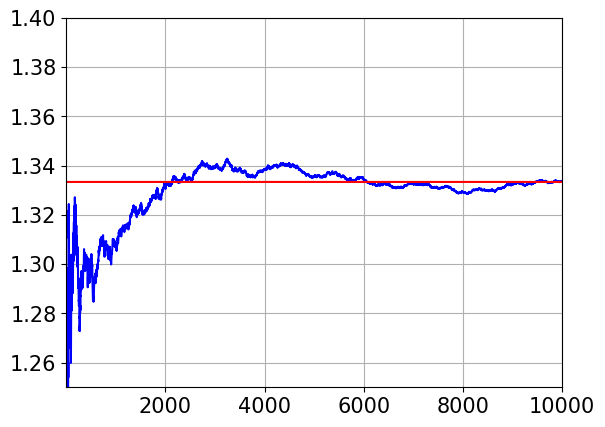

In [ ]:
plt.subplot()
plt.plot(x, y, color='b')
plt.plot(x, [4/3]*N, color='r')
plt.ylim((1.25, 1.4))
plt.xlim((1, N))
plt.grid()
plt.show()

# 16

 На отрезке $[0; T]$ наудачу бросили две точки. Пусть $γ$ – расстояние между ними. Найдите функцию распределения $γ$ и вычислите $\mathbb{E}(γ), \mathbb{Var}(γ),$
$ν_k(γ) = \mathbb{E}(γ^k)$.
<br><br>
Используя инструментарий IPython, постройте график зависимости среднего значения расстояния от числа экспериментов для $T =1$
>(Можно использовать генератор $uniform.rvs( size=n)$ из библиотеки $from ~scipy.stats ~import ~uniform$)

In [ ]:
T = 1
N = 10_000
x = uniform(0, T)
sample_gamma = [abs(x.rvs(size=1)[0] - x.rvs(size=1)[0]) for _ in range(N)]

In [ ]:
x1 = np.arange(1, N+1)
y1 = []
for j in x1:
  y1.append(sum(sample_gamma[:j]) / j)

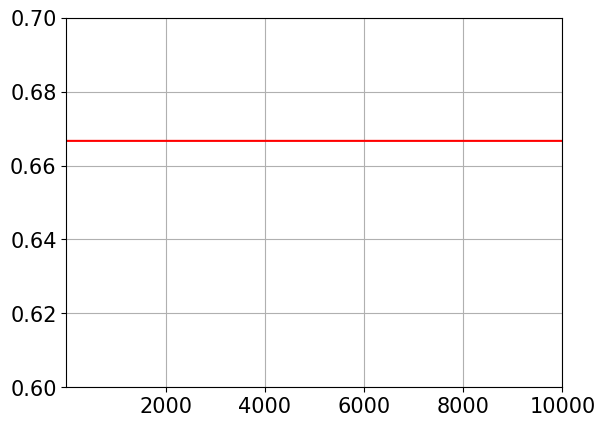

In [ ]:
plt.subplot()
plt.plot(x1, y1, color='b')
plt.plot(x1, [2/3]*N, color='r')
plt.ylim((0.6, 0.7))
plt.xlim((1, N))
plt.grid()
plt.show()

In [ ]:
E_gamma = sum(sample_gamma) / N
E_gamma

0.3306106564724405

In [ ]:
Var_gamma = sum(i**2 for i in sample_gamma) / N - E_gamma**2
Var_gamma

0.054705411134966936

In [ ]:
uniform(0, T+1).rvs(size=1)[0]

1.2558290782638626

# 17

Два человека договорились встретиться в промежутке времени $[0; T]$.
<br>Пусть $τ$ – время, которое придется ждать одному из них до момента встречи.
Найдите функцию распределения и вычислите $\mathbb{E}_τ$
<br><br>
Используя инструментарий IPython, постройте график зависимости среднего значения расстояния от числа экспериментов для $T =1$
>(Можно использовать генератор $uniform.rvs( size=n)$ из библиотеки $from ~scipy.stats ~import ~uniform$)

# 18

Абсолютно непрерывная случайная величина $X$ может принимать значения только в отрезке $[4; 7]$. На этом отрезке плотность распределения случайной величины X имеет вид: $f(x) = C (1 + 3x^{0,5} + 6x^{0,7} + 9x^{0,9})^{1,5}$ , где $C$ –
положительная константа. Найдите:
1. константу $C$;
2. математическое ожидание $\mathbb{E}(X)$;
3. стандартное отклонение $σ_X$;
4. квантиль уровня $0,8$ распределения $X$

In [ ]:
#1
def f(x):
    return (1 + 3*x**(0.5) + 6*x**(0.7) + 9*x**(0.9))**(1.5)

C = 1 / integrate.quad(f, 4, 7)[0]
C

0.0005726514726390773

In [ ]:
#2
def xf(x):
    return x*C*(1 + 3*x**(0.5) + 6*x**(0.7) + 9*x**(0.9))**(1.5)

E_x = integrate.quad(xf, 4, 7)[0]
E_x

5.660840501520957

In [ ]:
#3
def x_2f(x):
    return x**2*C*(1 + 3*x**(0.5) + 6*x**(0.7) + 9*x**(0.9))**(1.5)

Sigma_x = np.sqrt(integrate.quad(x_2f, 4, 7)[0] - E_x**2)
Sigma_x

0.8520933870647713

In [ ]:
#4
def f(x):
    return C*(1 + 3*x**(0.5) + 6*x**(0.7) + 9*x**(0.9))**(1.5)

In [ ]:
a, b = 4, 7
s = (a + b)/2
mn, mx = 4, 7
for _ in range(100):
    q = integrate.quad(f, a, s)[0]
    if q < 0.8:
        mn = s
        s = (mx+s)/2
    elif q > 0.8:
        mx = s
        s = (mn+s)/2
    else:
        break
q, s

(0.8, 6.529366928288726)

# 19

Случайная величина $X$ равномерно распределена на отрезке $[4; 8]$. Случайная величина $Y$ выражается через $X$ следующим образом: $Y = (1 + 6x^{0,5} +4x^{0,7} + 5x^{0,9})^{1,3}$.Найдите:

1. математическое ожидание $\mathbb{E}(Y)$;
2. стандартное отклонение $σ_Y$ ;
3. асимметрию $As(Y )$;
4. квантиль уровня $0,8$ распределения $Y$ .


$$
\int_4^8 (1 + 6x^{0,5} +4x^{0,7} + 5x^{0,9})^{1,3} dx
$$

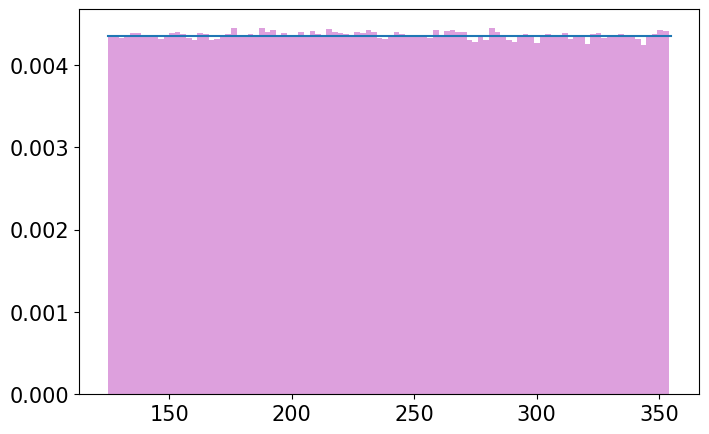

In [ ]:
N = 1_000_000
x = uniform(4,8)
y = (1+6*(t:= x.rvs(size = N))**0.5+4*t**0.7 + 5*t**0.9)**1.3

plt.figure(figsize=(8,5))
plt.hist(y, color='plum', density = True, bins = 100)
plt.plot([125,355],[0.00435]*2)
plt.show()